# IF3170 Artificial Intelligence | EDA Assignement

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks if needed.

Group Number: 01

Group Members:
- Muhammad Althariq Fairuz (13522027)
- Randy Verdian (13522067)

## Import Libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

## Import Dataset

### Dataset Basic Features

In [ ]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

basic_features = pd.read_csv('https://drive.google.com/uc?id=15Ke8EXyW_mOA2g7LNNCmPmRq19GwdQpN')
basic_features.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,id
0,FIN,0.121478,258,172,252,254,0,0,-,14158.942380,8495.365234,6,4,1
1,FIN,0.649902,734,42014,62,252,2,17,-,8395.112305,503571.312500,14,38,2
2,FIN,1.623129,364,13186,62,252,1,6,-,1572.271851,60929.230470,8,16,3
3,FIN,1.681642,628,770,62,252,1,3,ftp,2740.178955,3358.622070,12,12,4
4,FIN,0.449454,534,268,254,252,2,1,-,8561.499023,3987.059814,10,6,5


### Dataset Features Modified

In [ ]:
# Description about the data
features_modified= pd.read_csv("https://drive.google.com/uc?id=15dOCAj24Yj6YTyDm38VYK8VomTLP1BEm")
features_modified

,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)",basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and (-) if not much used service",basic


### Dataset Additional Features

In [ ]:
# Additional features
additional_features= pd.read_csv("https://drive.google.com/uc?id=1bXpPxFqKSrMliS1o_LZ8BisBqU_ynupc")
additional_features.head()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id
0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,0,1,0,0,0,43,6,1,1,1,1,2,2
2,0,1,0,0,0,7,6,2,2,1,1,3,3
3,0,1,0,1,1,1,1,2,2,1,1,3,4
4,0,1,0,0,0,43,39,2,2,2,1,40,5


### Dataset Content Features

In [ ]:
# Content Features
content_features= pd.read_csv("https://drive.google.com/uc?id=1uMWu5tP9FkdycRCA54u6ntJbTx0jZpjz")
content_features.head()

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id
0,255,255,621772692,2202533631,43,43,0,0,1
1,255,255,1417884146,3077387971,52,1106,0,0,2
2,255,255,2116150707,2963114973,46,824,0,0,3
3,255,255,1107119177,1047442890,52,64,0,0,4
4,255,255,2436137549,1977154190,53,45,0,0,5


### Dataset Flow Features

In [ ]:
# Flow features train
flow_features= pd.read_csv("https://drive.google.com/uc?id=1QEApSNxXekUUzN-uaYXs7M0K5vLRhVMd")
flow_features.head()

,proto,id
0,tcp,1
1,tcp,2
2,tcp,3
3,tcp,4
4,tcp,5


### Dataset Labels

In [ ]:
# Labels
labels_train= pd.read_csv("https://drive.google.com/uc?id=14ahNRNce5DejO7OvhNyzO4pvorw_t4kc")
labels_train.head()

,attack_cat,label,id
0,Normal,0,1
1,Normal,0,2
2,Normal,0,3
3,Normal,0,4
4,Normal,0,5


### Dataset Time Features

In [ ]:
# Time
time_features= pd.read_csv("https://drive.google.com/uc?id=1qe2TcAvjS5Wze76mswhFwbT_COb5JgYx")
time_features.head()

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id
0,30.177547,11.830604,24.295600,8.375000,0.000000,0.000000,0.000000,1
1,61.426934,1387.778330,49.915000,15.432865,0.000000,0.000000,0.000000,2
2,17179.586860,11420.926230,231.875571,102.737203,0.111897,0.061458,0.050439,3
3,259.080172,4991.784669,152.876547,90.235726,0.000000,0.000000,0.000000,4
4,2415.837634,115.807000,47.750333,75.659602,0.128381,0.071147,0.057234,5


### Dataset Full

In [ ]:
# Merge data
df= pd.merge(basic_features, additional_features, on="id", how="inner")\
       .merge(content_features, on="id", how="inner")\
       .merge(flow_features, on="id", how="inner")\
       .merge(labels_train, on="id", how="inner")\
       .merge(time_features, on="id", how="inner")
df.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,id,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,proto,attack_cat,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,FIN,0.121478,258,172,252,254,0,0,-,14158.942380,8495.365234,6,4,1,0,0,0,0,0,1,1,1,1,1,1,1,255,255,621772692,2202533631,43,43,0,0,tcp,Normal,0,30.177547,11.830604,24.295600,8.375000,0.000000,0.000000,0.000000
1,FIN,0.649902,734,42014,62,252,2,17,-,8395.112305,503571.312500,14,38,2,0,1,0,0,0,43,6,1,1,1,1,2,255,255,1417884146,3077387971,52,1106,0,0,tcp,Normal,0,61.426934,1387.778330,49.915000,15.432865,0.000000,0.000000,0.000000
2,FIN,1.623129,364,13186,62,252,1,6,-,1572.271851,60929.230470,8,16,3,0,1,0,0,0,7,6,2,2,1,1,3,255,255,2116150707,2963114973,46,824,0,0,tcp,Normal,0,17179.586860,11420.926230,231.875571,102.737203,0.111897,0.061458,0.050439
3,FIN,1.681642,628,770,62,252,1,3,ftp,2740.178955,3358.622070,12,12,4,0,1,0,1,1,1,1,2,2,1,1,3,255,255,1107119177,1047442890,52,64,0,0,tcp,Normal,0,259.080172,4991.784669,152.876547,90.235726,0.000000,0.000000,0.000000
4,FIN,0.449454,534,268,254,252,2,1,-,8561.499023,3987.059814,10,6,5,0,1,0,0,0,43,39,2,2,2,1,40,255,255,2436137549,1977154190,53,45,0,0,tcp,Normal,0,2415.837634,115.807000,47.750333,75.659602,0.128381,0.071147,0.057234


# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

#### Size of the data (1) and Data types (2)

In [ ]:
# Size of data and datatypes of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state              175341 non-null  object 
 1   dur                175341 non-null  float64
 2   sbytes             175341 non-null  int64  
 3   dbytes             175341 non-null  int64  
 4   sttl               175341 non-null  int64  
 5   dttl               175341 non-null  int64  
 6   sloss              175341 non-null  int64  
 7   dloss              175341 non-null  int64  
 8   service            175341 non-null  object 
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  spkts              175341 non-null  int64  
 12  dpkts              175341 non-null  int64  
 13  id                 175341 non-null  int64  
 14  is_sm_ips_ports    175341 non-null  int64  
 15  ct_state_ttl       175341 non-null  int64  
 16  ct

#### Number of Unique Values for Categorical Features (3)

In [ ]:
# Filter all categorical features
cat_df = df.select_dtypes(include=['object'])
cat_df.describe()

,state,service,proto,attack_cat
count,175341,175341,175341,175341
unique,9,13,133,10
top,INT,-,tcp,Normal
freq,82275,94168,79946,56000


#### Numerical Features Statistics (4)

In [ ]:
# Filter all numerical features
num_df= df.select_dtypes(include=['int64', 'float64'])
num_df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,id,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,8.844844e+03,1.492892e+04,179.546997,79.609567,4.953000,6.948010,7.345403e+07,6.712056e+05,20.298664,18.969591,87671.000000,0.015752,1.304179,0.133066,0.014948,0.014948,9.306437,9.100758,6.193936,6.955789,5.383538,4.206255,8.729881,116.257339,115.013625,9.692504e+08,9.688770e+08,136.751769,124.173382,0.105982,2.144292e+03,0.680622,4.976254e+03,604.353826,985.976864,88.216296,0.041396,0.021020,0.020375
std,6.480249,1.747656e+05,1.436542e+05,102.940011,110.506863,66.005059,52.732999,1.883574e+08,2.421312e+06,136.887597,110.258271,50616.731112,0.124516,0.954406,0.701208,0.126048,0.126048,10.704331,10.756952,8.052476,8.321493,8.047104,5.783585,10.956186,127.001024,126.886530,1.355264e+09,1.354000e+09,204.677360,258.317056,0.776911,5.420797e+04,0.466237,4.496585e+04,4061.043281,7242.245841,987.093195,0.079354,0.043400,0.040506
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.305334e+04,0.000000e+00,2.000000,0.000000,43836.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,57.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,4.300000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.796748e+05,1.447023e+03,2.000000,2.000000,87671.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,73.000000,44.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.279733,0.006000,0.000000,0.000000,0.000000
75%,0.668069,1.418000e+03,1.102000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.784487e+04,12.000000,10.000000,131506.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,3.000000,12.000000,255.000000,255.000000,1.916651e+09,1.913675e+09,100.000000,89.000000,0.000000,0.000000e+00,1.000000,2.513295e+03,114.990625,55.156896,51.053000,0.065481,0.023268,0.038906
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,10974.000000,175341.000000,1.000000,6.000000,30.000000,4.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,46.000000,65.000000,255.000000,255.000000,4.294959e+09,4.294882e+09,1504.000000,1458.000000,172.000000,6.558056e+06,1.000000,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


#### Insight:

- Total ada 42 fitur dan 7 diantaranya merupakan kategorikal dan 3 dari 7 fitur kategorikal tersebut adalah binary (label, is_sm_ips_ports, is_ftp_login)
- *Range* nilai dari fitur numerikal sangat bervariasi
- Selain itu, data dipastikan tidak ada yang null karena semua fitur bersifat non-null

#### The significance of gathering information above (5)

Mengapa perlu dilakukan penentuan ukuran data, tipe data dari tiap fitur, jumlah nilai unik apda fitur kategorikal, dan nilai min, max, mean, median, serta standar deviasi untuk fitur numerikal? Karena:

a) Ukuran Data:
- Membantu menentukan apakah dataset cukup besar untuk analisis yang bermakna
- Membantu dalam pemilihan algoritma machine learning yang sesuai nantinya

b) Tipe Data:
- Mengarahkan langkah-langkah preprocessing yang diperlukan (encoding untuk kategorikal, scaling/normalisasi untuk numerik)
- Membantu mengidentifikasi masalah kualitas data

c) Nilai Unik dalam Fitur Kategorikal:
- Membantu mengidentifikasi masalah kardinalitas (terlalu banyak kategori)
- Menentukan *feature engineering* yang tepat, seperti apakah kategori perlu digabung
- Menunjukkan potensi ketidakseimbangan dalam distribusi kategorikal
- Membantu dalam memilih metode encoding yang tepat

d) Statistik Numerik:
- Mengidentifikasi potensi outlier melalui nilai min/max
- Menunjukkan karakteristik distribusi data (mean vs median untuk skewness)
- Membantu dalam menentukan metode scaling/normalisasi
- Menunjukkan potensi adanya *outliers*

Semua informasi ini bersama-sama membentuk dasar untuk:
- Keputusan preprocessing data
- *Feature engineering*
- Pemilihan algoritma ML

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

#### Missing values (1)

In [ ]:
# Missing values
df.isnull().sum()

,0
state,0
dur,0
sbytes,0
dbytes,0
sttl,0
dttl,0
sloss,0
dloss,0
service,0
sload,0


#### Insight:

- Tidak ada data yang kosong/*missing values* seperti yang telah disebutkan sebelumnya

#### Outliers (2)

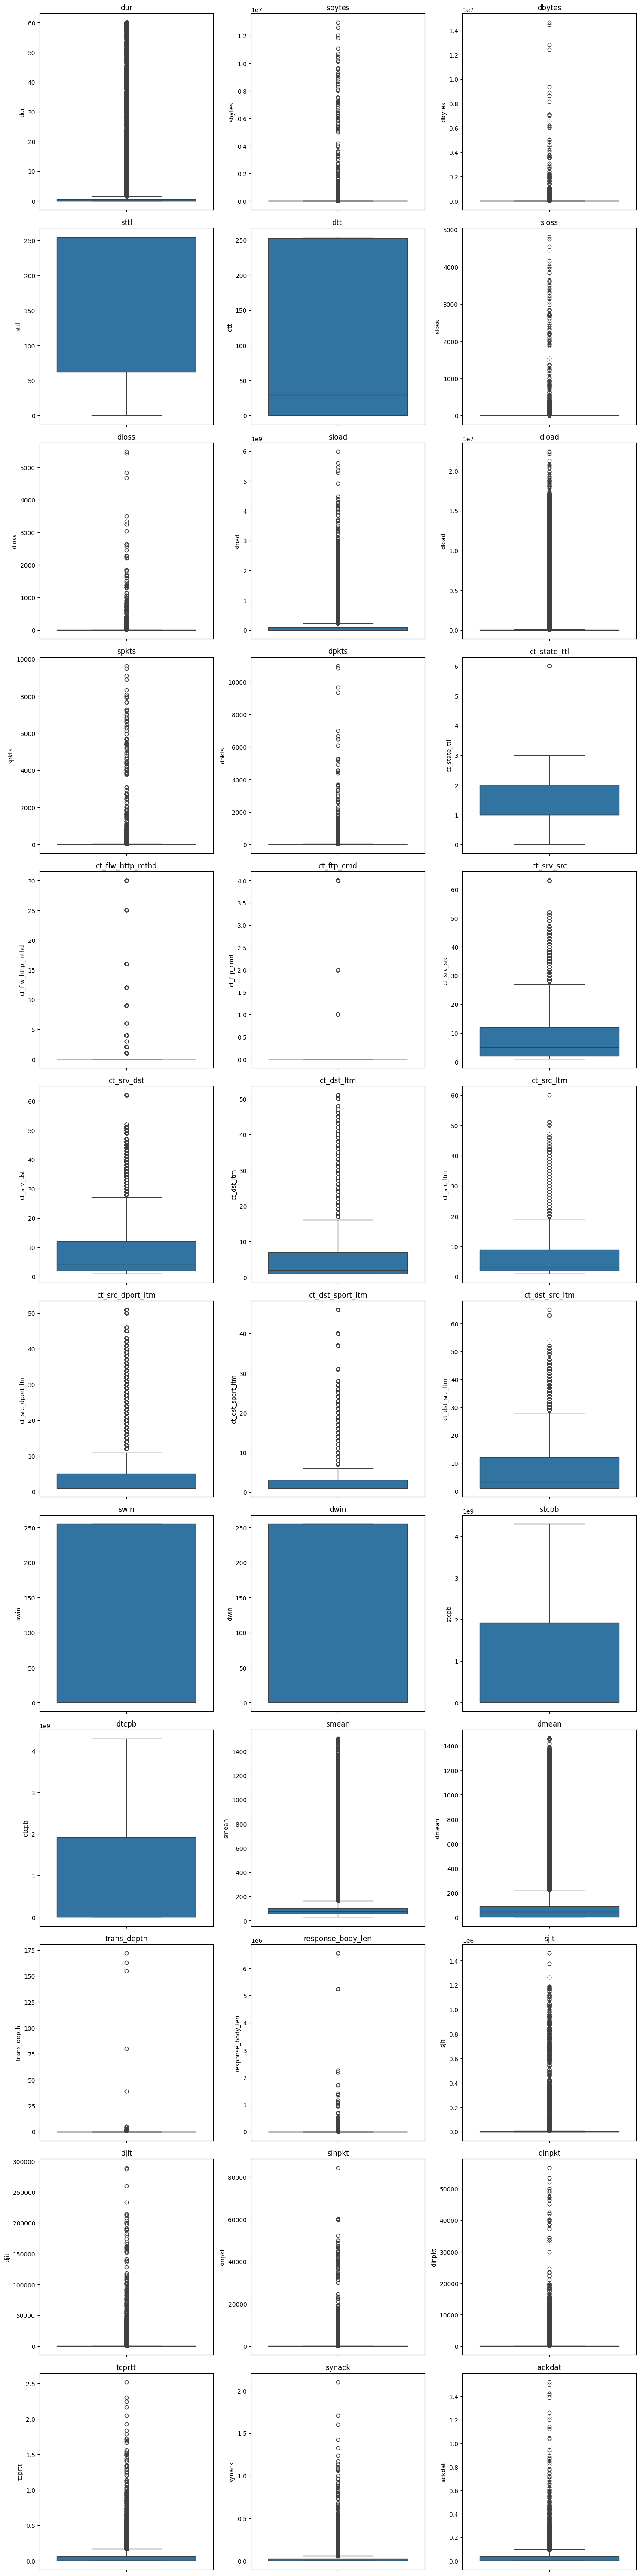

In [ ]:
# Outliers
# Drop binary feature first since we will use different plot for them later
num_df_without_binary = num_df.drop(['id','label','is_ftp_login', 'is_sm_ips_ports'], axis=1)

# Calculate number of features
n_features = len(num_df_without_binary.columns)

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel()  # Flatten the axes array

# Create a boxplot for each feature
for idx, column in enumerate(num_df_without_binary.columns):
    sns.boxplot(data=num_df_without_binary[column], ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
for feat in num_df_without_binary.columns:
    Q1, Q3 = num_df_without_binary[feat].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    outliers_count = num_df_without_binary[(num_df_without_binary[feat] < (Q1 - 1.5 * IQR)) |
                           (num_df_without_binary[feat] > (Q3 + 1.5 * IQR))][feat].count()

    print(f"Number of outliers in {feat}: {outliers_count} ({(outliers_count/len(num_df_without_binary))*100:.2f}%)")

Number of outliers in dur: 15741 (8.98%)
Number of outliers in sbytes: 22873 (13.04%)
Number of outliers in dbytes: 28131 (16.04%)
Number of outliers in sttl: 0 (0.00%)
Number of outliers in dttl: 0 (0.00%)
Number of outliers in sloss: 11467 (6.54%)
Number of outliers in dloss: 28388 (16.19%)
Number of outliers in sload: 13518 (7.71%)
Number of outliers in dload: 38143 (21.75%)
Number of outliers in spkts: 24675 (14.07%)
Number of outliers in dpkts: 20830 (11.88%)
Number of outliers in ct_state_ttl: 1930 (1.10%)
Number of outliers in ct_flw_http_mthd: 17840 (10.17%)
Number of outliers in ct_ftp_cmd: 2567 (1.46%)
Number of outliers in ct_srv_src: 19390 (11.06%)
Number of outliers in ct_srv_dst: 19341 (11.03%)
Number of outliers in ct_dst_ltm: 22152 (12.63%)
Number of outliers in ct_src_ltm: 13140 (7.49%)
Number of outliers in ct_src_dport_ltm: 33423 (19.06%)
Number of outliers in ct_dst_sport_ltm: 37337 (21.29%)
Number of outliers in ct_dst_src_ltm: 17752 (10.12%)
Number of outliers in 

#### Insight:

Jika outliers adalah data yang berada diluar
batas Bawah (Lower Bound) = Q1 - (1.5 × IQR) atau batas Atas (Upper Bound) = Q3 + (1.5 × IQR), terdapat beberapa *outliers* pada beberapa fitur, terutama fitur ct_dst_sport_ltm yang mencapai 21%

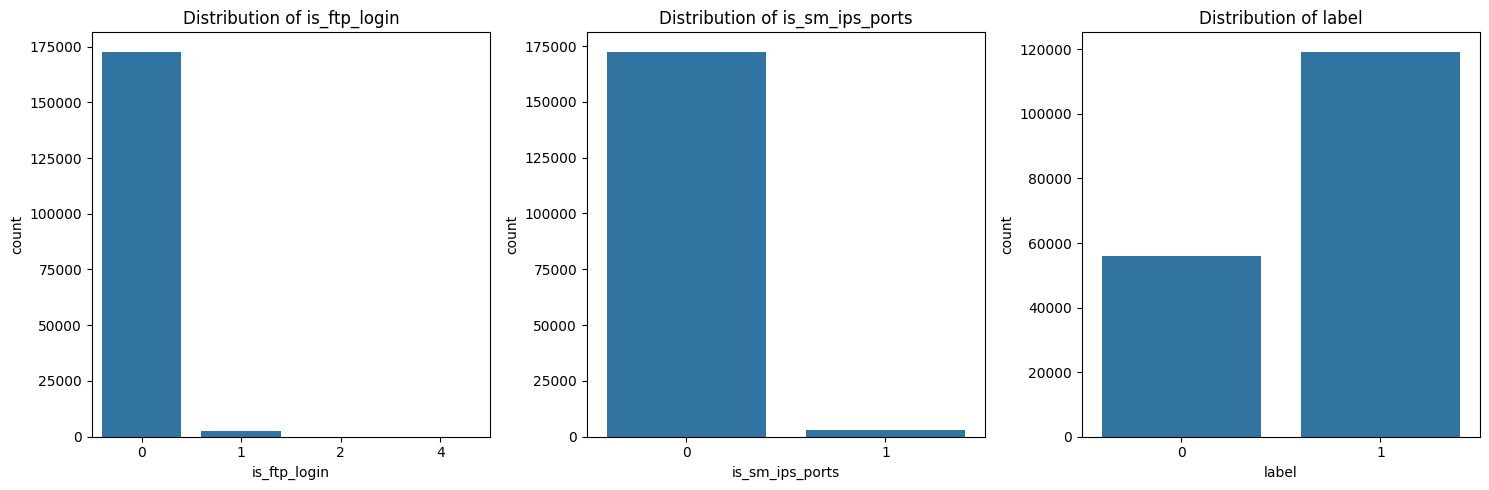

In [ ]:
# Create plots for binary features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='is_ftp_login', data=df)
plt.title('Distribution of is_ftp_login')

plt.subplot(1, 3, 2)
sns.countplot(x='is_sm_ips_ports', data=df)
plt.title('Distribution of is_sm_ips_ports')

plt.subplot(1, 3, 3)
sns.countplot(x='label', data=df)
plt.title('Distribution of label')

plt.tight_layout()
plt.show()

#### Insight:

Dari visualisasi bar plot untuk data yang bertipe binary, ada *outliers* pada *is_ftp_login*, fitur bertipe binary tidak seharusnya memiliki value selain 0 dan 1. Selain itu, untuk *target value* (label), persebaran antara 0 dan 1 hampir mendekati 1:2. Namun, untuk *is_ftp_login* dan *is_sm_ips_ports*, persebaran data cenderung lebih ke 0 daripada ke 1.

#### Checking for missing values and outliers is necessary (3)

Mengapa perlu dilakukan pengecekan *outliers* dan *missing values*? Karena:

**A. Missing Values**

Pengecekan terhadap *missing values* dieprlukan karena *missing values* akan memengaruhi akurasi dari model. Selain itu, analisis dari *missing values* juga diperlukan untuk menentukan penanganan yang tepat, seperti men-*drop* baris yang berisi *missing values* atau mengisinya dengan menggunakan statistik tertenu (imputer)  

**B. Outliers**

Kehadiran *outliers* akan memengaruhi statistik dari data yang ada sehingga hal ini tentu akan memengaruhi tingkat akurasi model yang digunakan, pengecekan terhadap *outliers* juga akan menentukan keputusan ktia terhadpa *outliers* tersebut apakah dibiarkan (karena *outliers* tersebut memang kasus yang unik/ termasuk data yang valid), di-*drop*, atau diganti nilainya dengan batas atas/bawah IQR.



### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

#### Correlations between features (1)

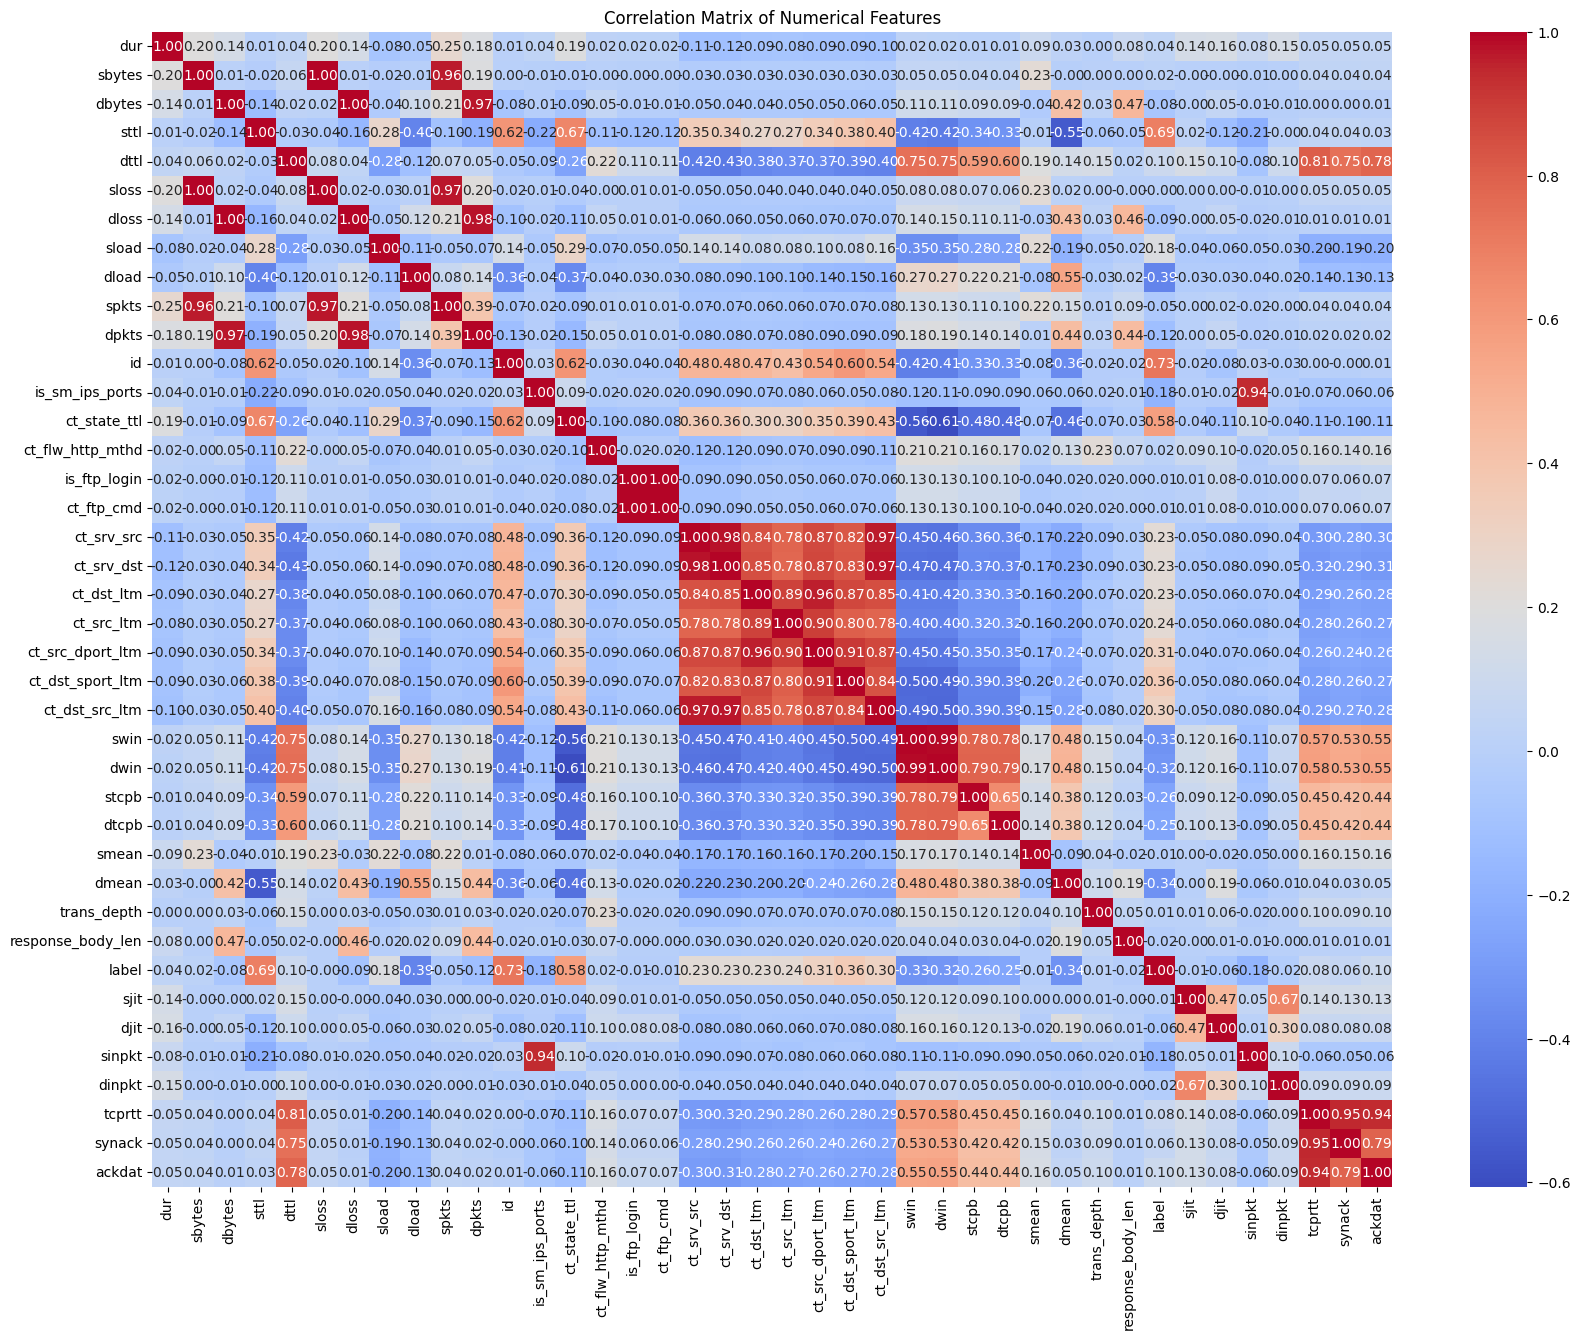

In [ ]:
# correlation between numerical and numerical features
plt.figure(figsize=(20, 15))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

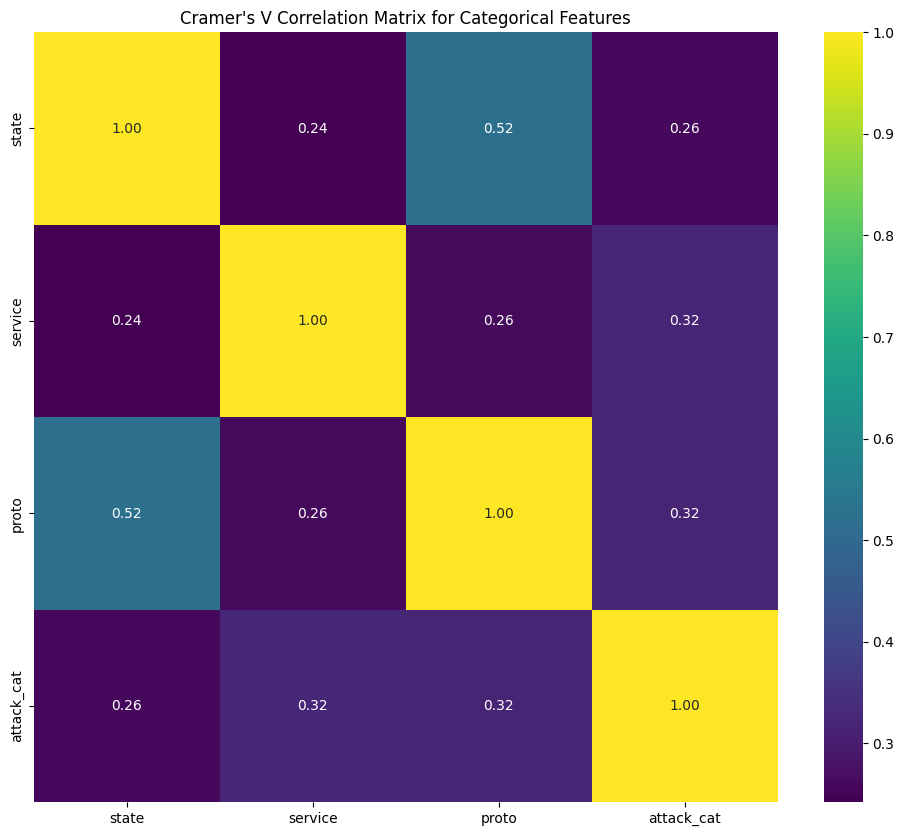

In [ ]:
# correlation between categorical and categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
correlation_matrix = df[categorical_features].apply(lambda x: df[categorical_features].apply(lambda y: cramers_v(x, y))).fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Cramer's V Correlation Matrix for Categorical Features")
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


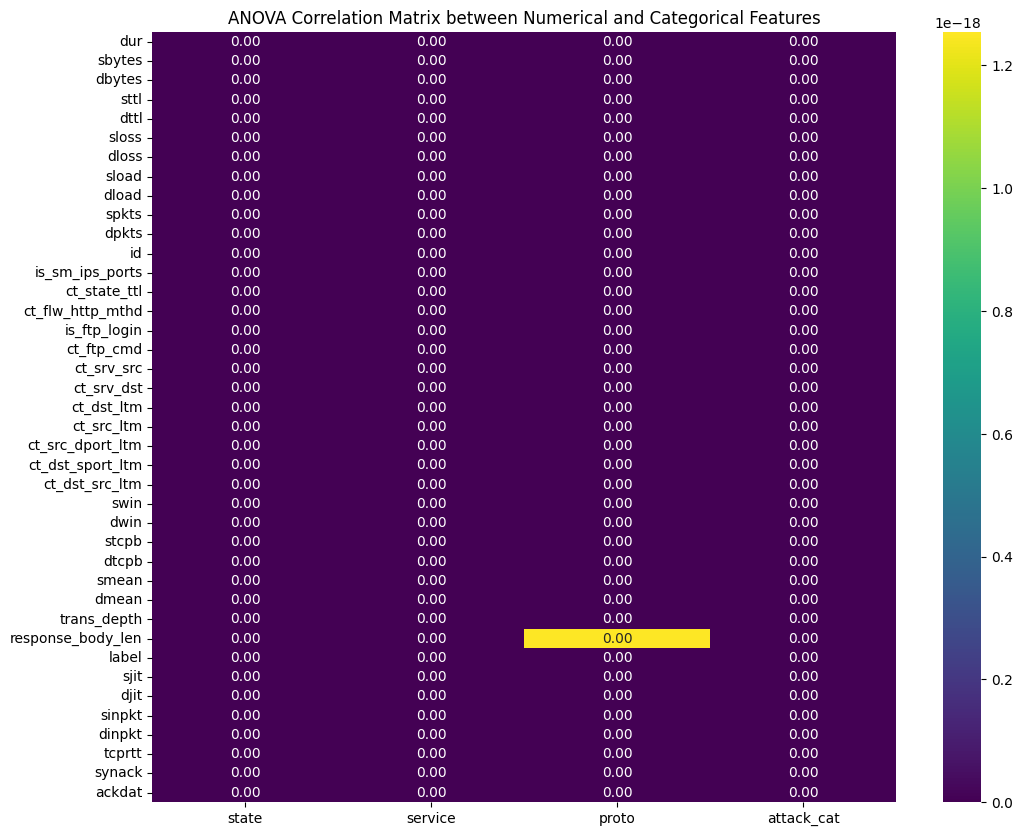

In [ ]:
# correlation between numerical and categorical features

# Calculate the correlation between numerical and categorical features using ANOVA
def anova_correlation(df, numerical_feature, categorical_feature):
    groups = df.groupby(categorical_feature)[numerical_feature].apply(list)
    f_statistic, p_value = stats.f_oneway(*groups)
    return f_statistic, p_value

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
correlation_matrix = pd.DataFrame(index=numerical_features, columns=categorical_features)

# Calculate the correlation between each numerical and categorical feature
for numerical_feature in numerical_features:
    for categorical_feature in categorical_features:
        _, p_value = anova_correlation(df, numerical_feature, categorical_feature)
        correlation_matrix.loc[numerical_feature, categorical_feature] = p_value

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("ANOVA Correlation Matrix between Numerical and Categorical Features")
plt.show()

#### Visualization of distibution (2)

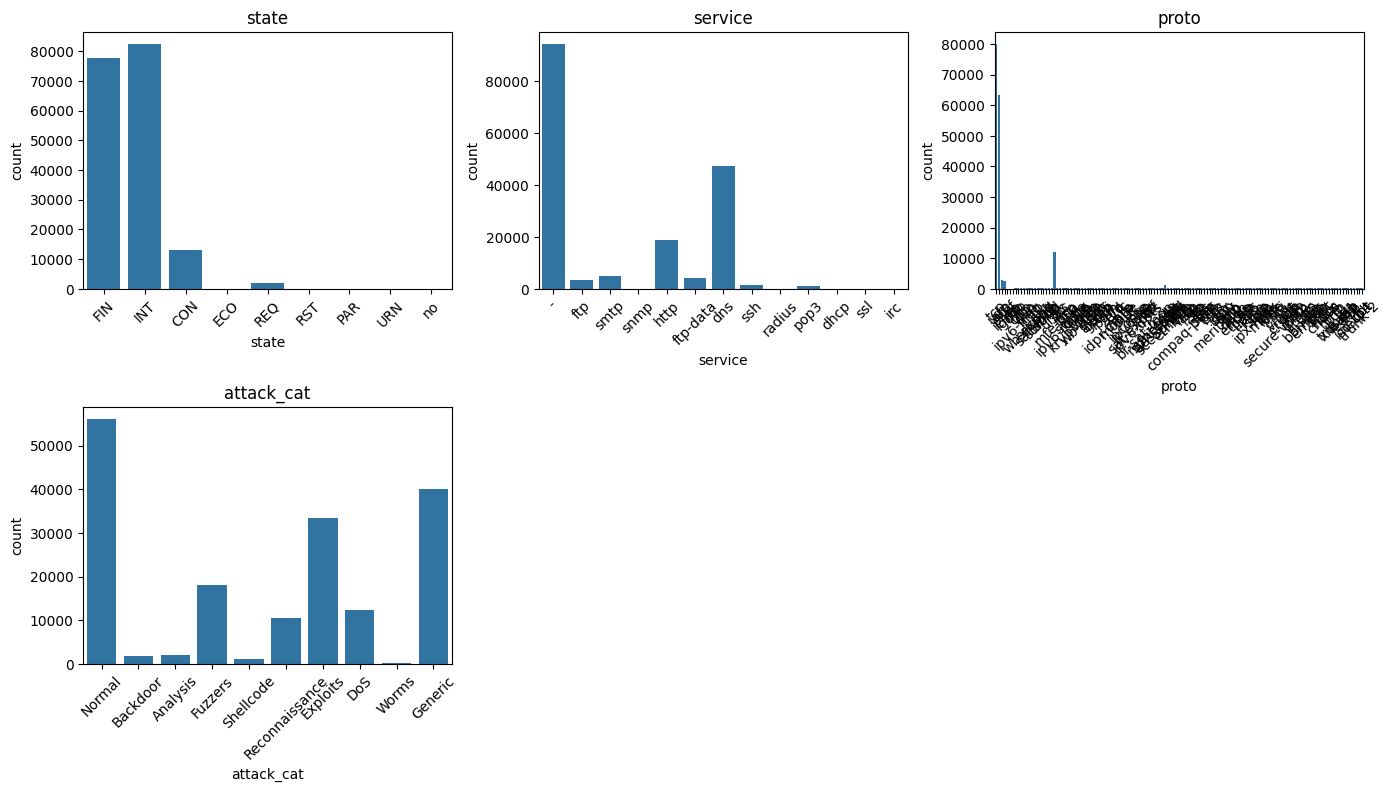

In [ ]:
# visualize distribution (categorical)
n_features = len(cat_df.columns)

n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(14, n_rows * 4))

for i, feature in enumerate(cat_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=cat_df, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.tight_layout(pad=1.0)

plt.show()

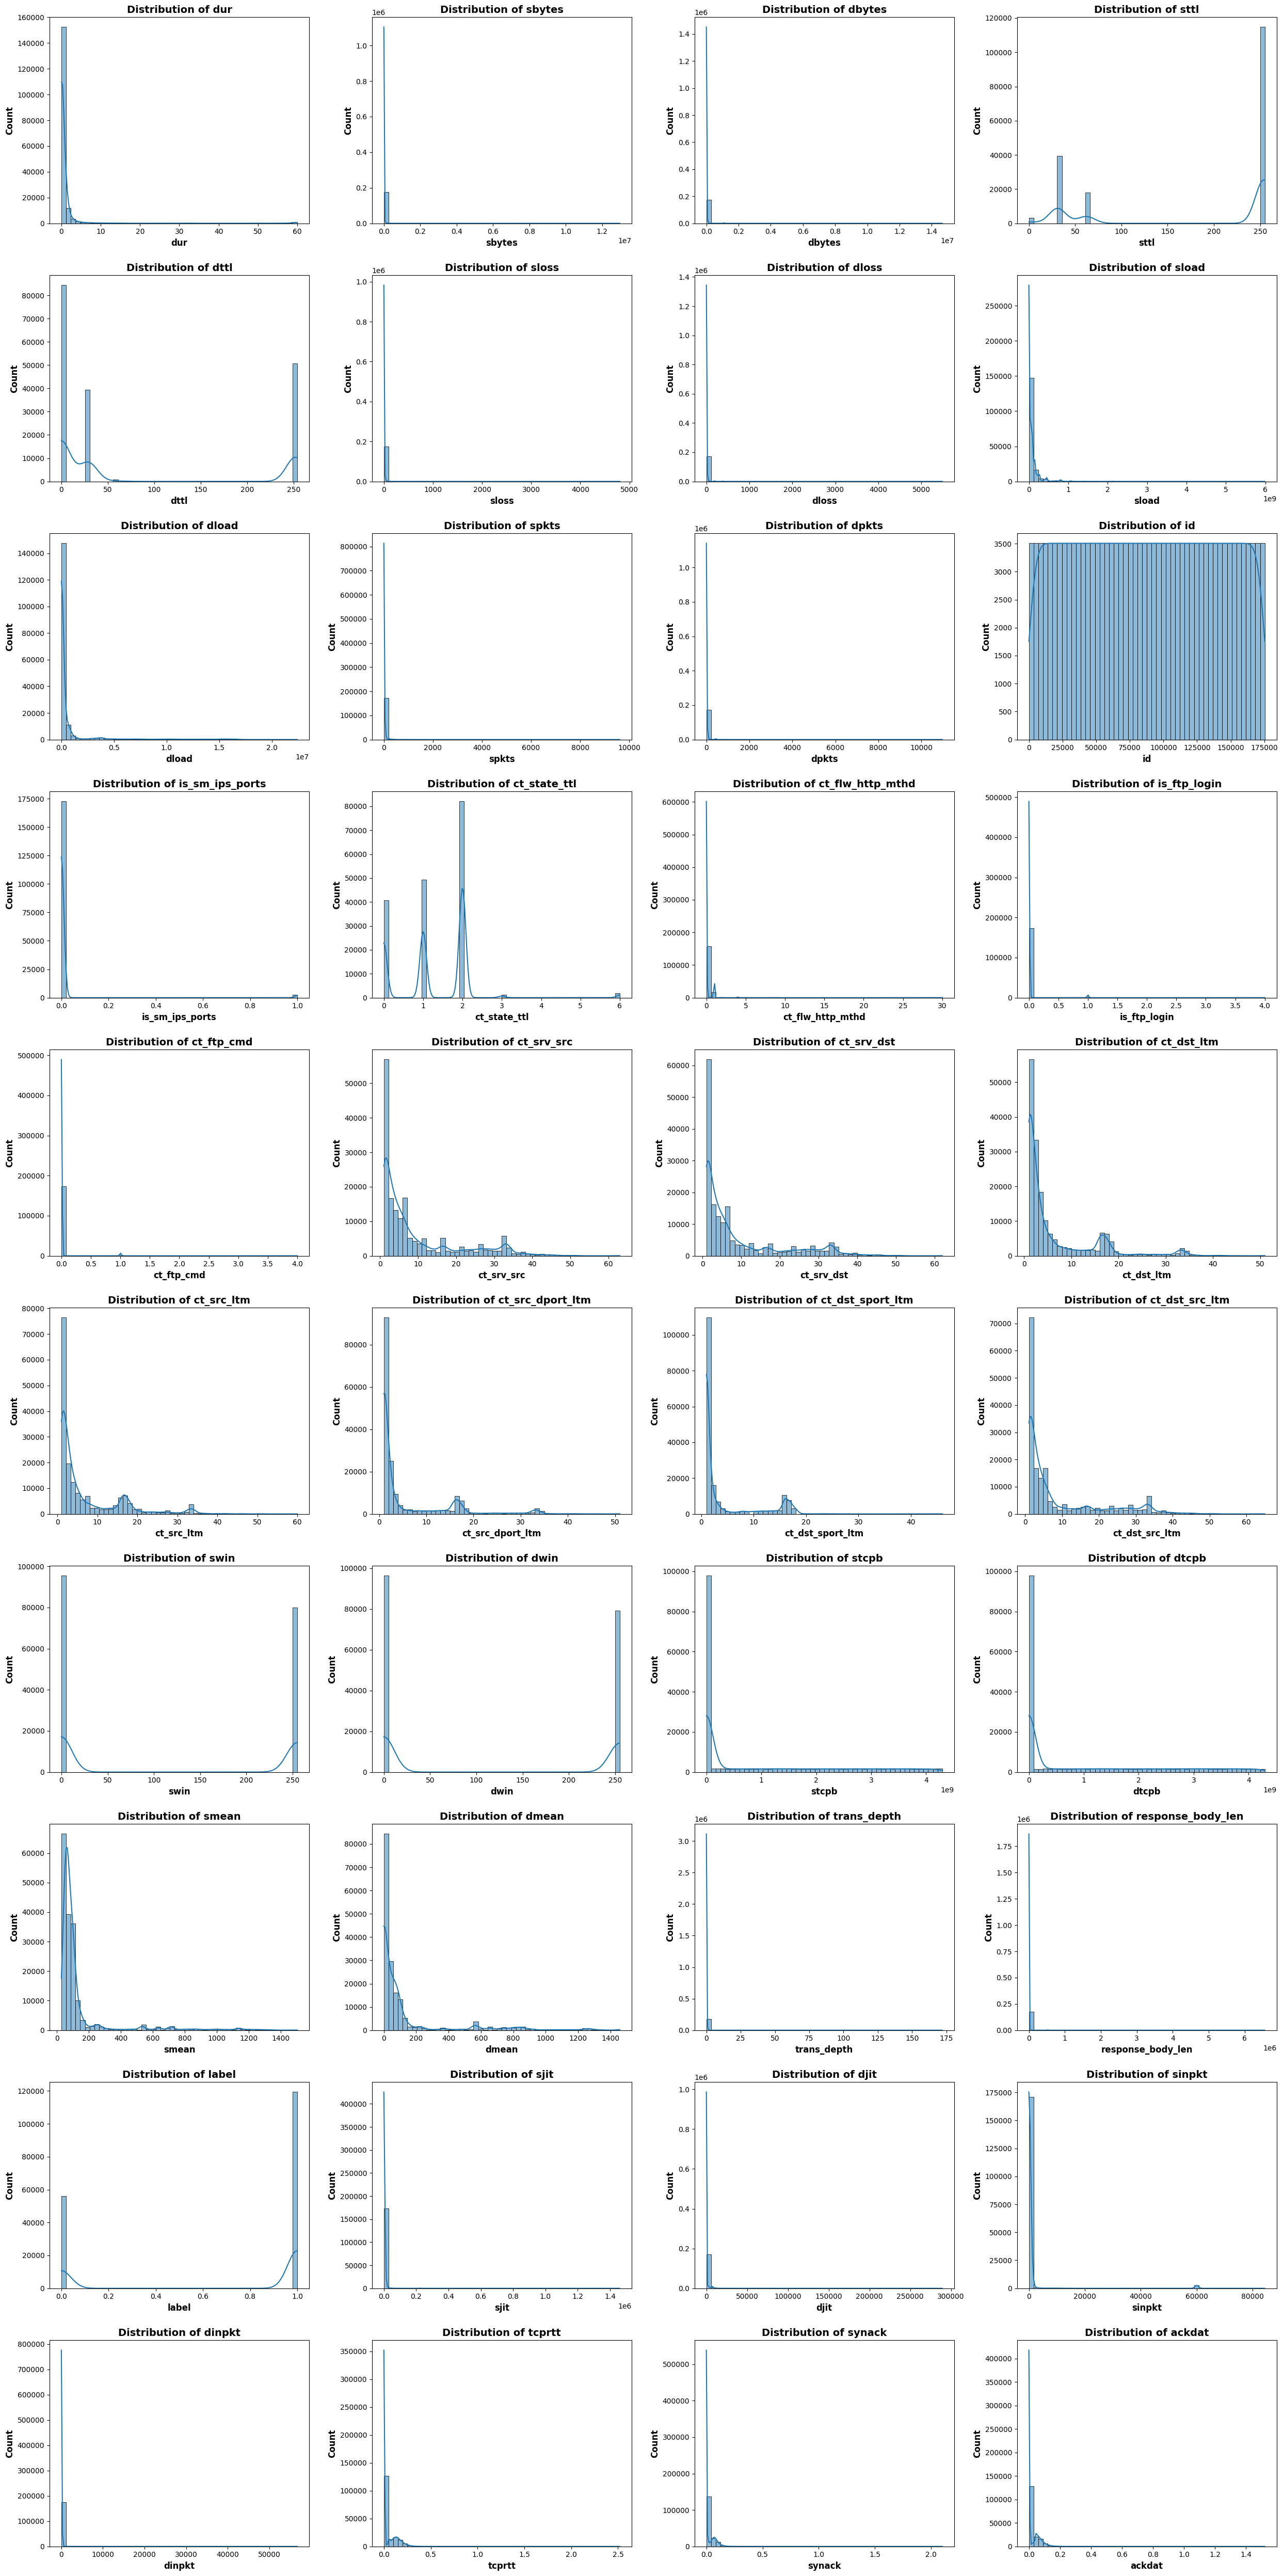

In [ ]:
# Visualisasi distribusi (continuous)
num_columns = len(num_df.columns)
ncols = 4
nrows = (num_columns + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 5 * nrows))

for i, column in enumerate(num_df.columns):
    row, col = divmod(i, ncols)
    sns.histplot(num_df[column], bins=50, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel(column, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Count', fontsize=12, fontweight='bold')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

#### Visualization of correlation (3)

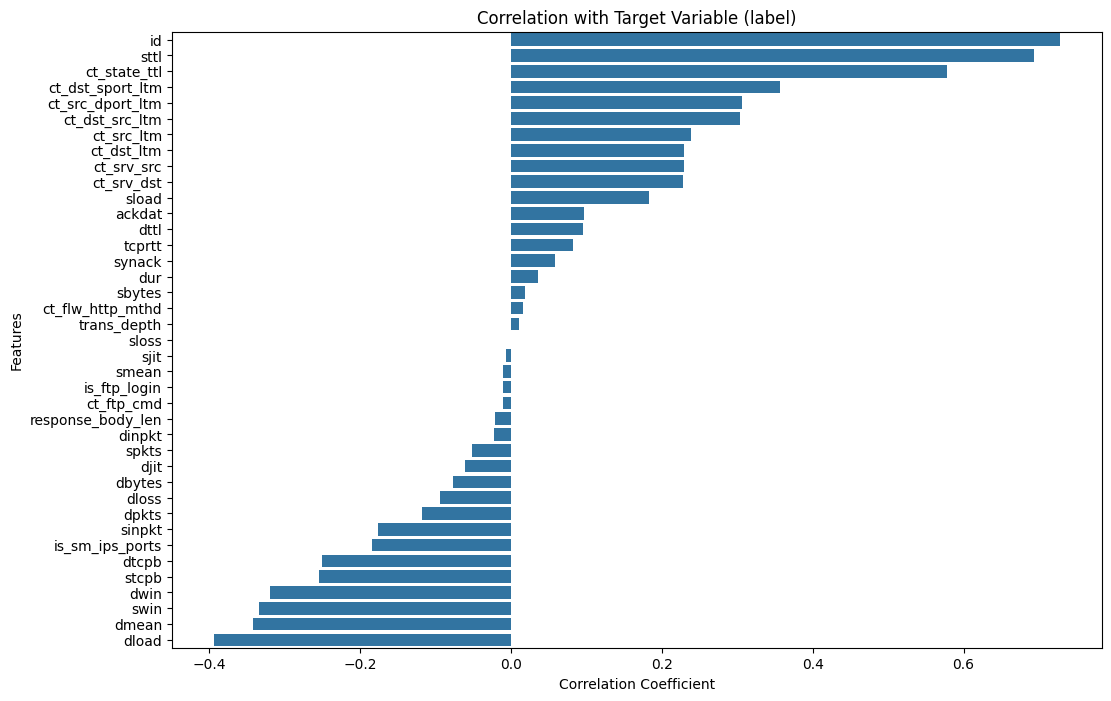

In [ ]:
# Calculate pearson correlation between features and target variable
correlation_matrix = num_df.corr()

# Select correlations with the target variable
target_variable = 'label'
correlations_with_target = correlation_matrix[target_variable].drop(target_variable)

# Sort correlations in descending order
correlations_with_target = correlations_with_target.sort_values(ascending=False)

# Visualize correlations with target variable
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index)
plt.title('Correlation with Target Variable (label)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

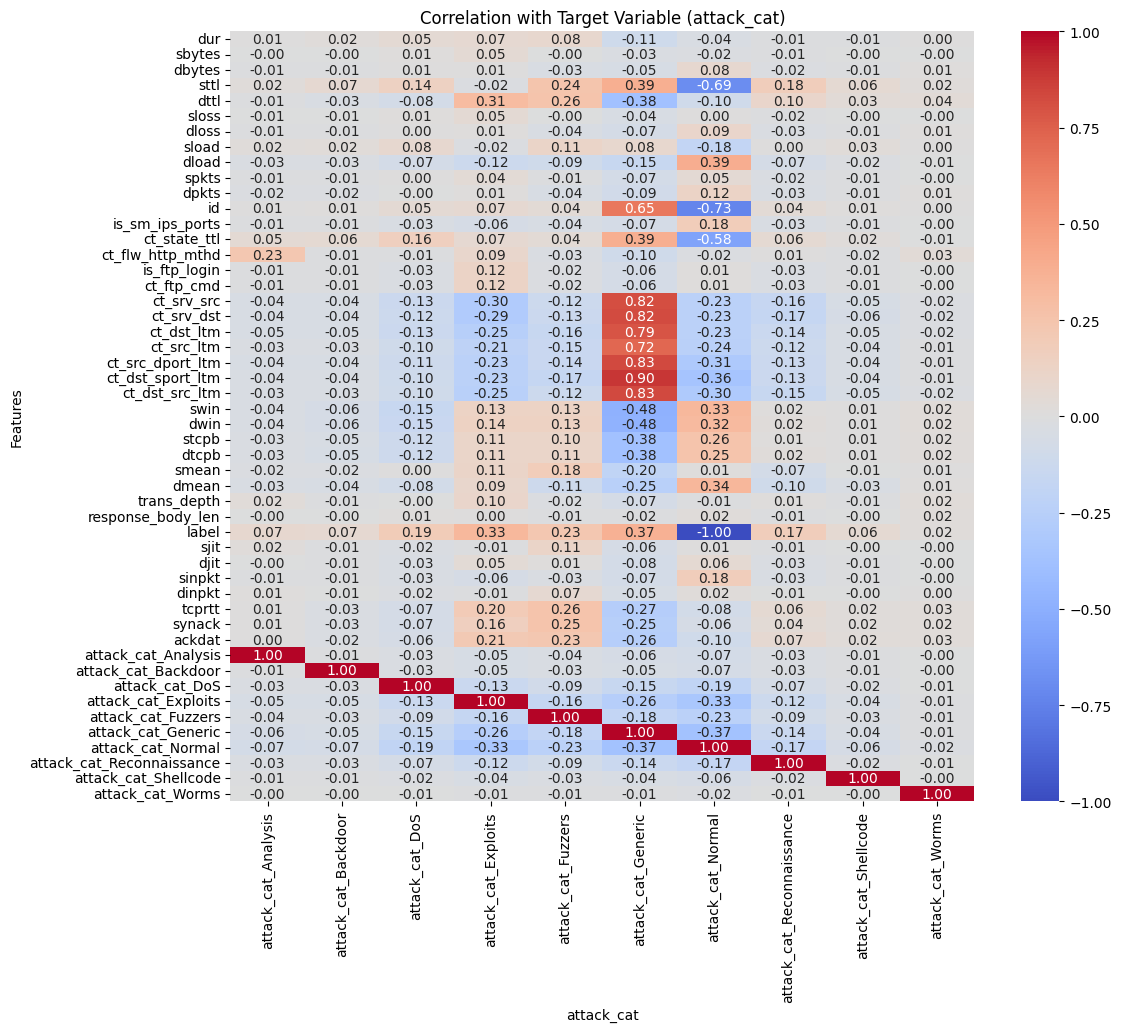

In [ ]:
# visualize of correlation of each feature with target attack cat
from sklearn.preprocessing import OneHotEncoder

# Encode 'attack_cat' using OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
attack_cat_encoded = one_hot_encoder.fit_transform(df[['attack_cat']])
attack_cat_encoded_df = pd.DataFrame(attack_cat_encoded, columns=one_hot_encoder.get_feature_names_out(['attack_cat']))

# Concat
num_df_encoded = pd.concat([num_df, attack_cat_encoded_df], axis=1)

# Calculatec correlation using pearson
correlation_df = num_df_encoded.corr()
correlation_target = correlation_df[attack_cat_encoded_df.columns]

# Visualize heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_target, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation with Target Variable (attack_cat)')
plt.xlabel('attack_cat')
plt.ylabel('Features')
plt.show()

#### Insight:

- Distribusi features kebanyakan *skewed* kanan.
- STTL memiliki korelasi positif yang kuat dengan label, sedangkan DLOAD memiliki korelasi negatif yang cukup kuat dengan label.
- CT_SRV_SRC, CT_SRV_DST, CT_DST_LTM, CT_SRC_LTM, CT_SRC_DPORT_LTM, CT_DST_SPORT_LTM, CT_DST_SRC_LTM memiliki korelasi positif yang kuat dengan Genetic attacks.

#### The significance of distribution and correlation (4)

Beberapa alasan kenapa memahami distribusi dan korelasi setiap fitur itu penting, yaitu sebagai berikut:

- Memahami Pola Data

Distribusi fitur membantu kita melihat bagaimana data tersebar dan apakah ada pola tertentu, seperti distribusi normal atau *skewed*. Ini penting untuk mengidentifikasi *outliers* yang mungkin memengaruhi hasil analisis atau performa model.

- Identifikasi Ketidakseimbangan Data

Dengan melihat distribusi fitur, kita bisa mengetahui apakah ada ketidakseimbangan dalam data, terutama dalam data kategorikal seperti variabel target misalnya, distribusi label "normal" vs "attack".

- Pemilihan Fitur yang Relevan

Korelasi fitur dengan target membantu dalam memilih fitur yang relevan atau yang paling berpengaruh terhadap variabel target. Fitur dengan korelasi tinggi terhadap target mungkin lebih bermanfaat dan bisa membantu meningkatkan performa model. Sebaliknya, fitur yang sangat berkorelasi satu sama lain dapat menyebabkan redundansi dan *overfitting*, sehingga dapat dipertimbangkan untuk dieliminasi.

- Menentukan Teknik Pra-pemrosesan

Memahami distribusi fitur memungkinkan kita menentukan teknik pra-pemrosesan yang sesuai, seperti normalisasi atau standarisasi. Misalnya, jika data memiliki distribusi yang sangat *skewed*, maka teknik transformasi log atau *scaling* mungkin diperlukan agar model machine learning dapat bekerja dengan lebih baik.

- Membantu dalam Pemilihan Model dan Evaluasi

Beberapa model machine learning, seperti regresi linear, mengasumsikan adanya hubungan linear antar fitur. Dengan menganalisis korelasi, kita bisa lebih yakin apakah model yang dipilih sesuai dengan data. Distribusi dan korelasi juga membantu kita dalam mengevaluasi performa model dengan lebih baik.

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. What are the most common protocols (proto) in the dataset, and are certain protocols more associated with specific attack categories?
2. Are there significant differences in the values of network characteristics such as sload, sload, sbytes, and dbytes between attack and normal records?
3. How does TCP-setup-related features vary, such as tcprtt, synack, and ackdat, across normal records and each type of attack records?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. What are the most common protocols (proto) in the dataset, and are certain protocols more associated with specific attack categories?

In [ ]:
df["proto"].value_counts().head(1)

,count
proto,
tcp,79946


In [ ]:
df[["attack_cat","proto"]].value_counts().head(20)

,,count
attack_cat,proto,
Generic,udp,39229
Normal,tcp,39121
Exploits,tcp,19689
Normal,udp,13922
Fuzzers,tcp,11761
Exploits,unas,5280
Reconnaissance,tcp,5100
Fuzzers,udp,4945
DoS,unas,4080


In [ ]:
# Create contingency table
contingency_table = pd.crosstab(df['proto'], df['attack_cat'])
print("\nContingency Table:")
print(contingency_table.to_string())

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")


Contingency Table:
attack_cat   Analysis  Backdoor   DoS  Exploits  Fuzzers  Generic  Normal  Reconnaissance  Shellcode  Worms
proto                                                                                                      
3pc                 5         5    34        44        5        1       0               6          0      0
a/n                 5         5    34        44        5        1       0               6          0      0
aes-sp3-d           5         5    34        44        5        1       0               6          0      0
any                15        15   102       132       15        3       0              18          0      0
argus               5         4    34        44        5        0       0               6          0      0
aris                5         5    34        44        5        1       0               6          0      0
arp                 0         0     0         0        0        0    2859               0          0      0
ax.25   

In [ ]:
# Analisis detail untuk protokol utama
def protocol_analysis(data, protocol):
    row = data.loc[protocol]
    total = row.sum()
    # Hitung persentase untuk setiap kategori serangan
    percentages = (row / total * 100).round(2)
    # Urutkan dari yang terbesar
    sorted_attacks = percentages.sort_values(ascending=False)
    return total, sorted_attacks

# Berdasarkan data contingency table yang diberikan
def analyze_protocol_totals(data):

    # 1. Hitung total serangan per protokol
    protocol_totals = data.sum(axis=1)  # Menjumlahkan semua kolom untuk setiap baris (protokol)

    # Urutkan dari yang terbesar
    protocol_totals_sorted = protocol_totals.sort_values(ascending=False)

    # 2. Print analisis
    print("ANALISIS DETAIL SERANGAN PER PROTOKOL")
    print("\n1. Total Serangan per Protokol (Top 10):")
    print("----------------------------------------")
    for protocol in protocol_totals_sorted.head(10).index:
        total = protocol_totals_sorted[protocol]
        print(f"{protocol}: {total:,} serangan")

    # 3. Analisis detail untuk protokol utama
    protocols = protocol_totals_sorted.head(10).index

    print("\n2. Analisis Detail Protokol Utama:")
    print("----------------------------------------")
    for protocol in protocols:
        if protocol in data.index:
            total, attack_distribution = protocol_analysis(data, protocol)
            print(f"\n{protocol.upper()}:")
            print(f"Total serangan: {total:,}")
            print("Distribusi serangan:")
            for attack_type, percentage in attack_distribution.items():
                if percentage > 0:  # Hanya tampilkan yang ada serangan
                    count = data.loc[protocol, attack_type]
                    print(f"- {attack_type}: {count:,} ({percentage:.1f}%)")

    # 4. Hitung statistik aggregat
    total_all_attacks = protocol_totals.sum()
    print(f"\n3. Total Semua Serangan: {total_all_attacks:,}")

    # 5. Analisis per kategori serangan
    attack_totals = data.sum()
    attack_percentages = (attack_totals / total_all_attacks * 100).round(2)

    print("\n4. Distribusi Kategori Serangan:")
    print("----------------------------------------")
    for attack, count in attack_totals.sort_values(ascending=False).items():
        percentage = attack_percentages[attack]
        if count > 0:  # Hanya tampilkan yang ada serangan
            print(f"{attack}: {count:,} ({percentage:.1f}%)")

analyze_protocol_totals(contingency_table)

ANALISIS DETAIL SERANGAN PER PROTOKOL

1. Total Serangan per Protokol (Top 10):
----------------------------------------
tcp: 79,946 serangan
udp: 63,283 serangan
unas: 12,084 serangan
arp: 2,859 serangan
ospf: 2,595 serangan
sctp: 1,150 serangan
any: 300 serangan
gre: 225 serangan
swipe: 201 serangan
ipv6: 201 serangan

2. Analisis Detail Protokol Utama:
----------------------------------------

TCP:
Total serangan: 79,946
Distribusi serangan:
- Normal: 39,121 (48.9%)
- Exploits: 19,689 (24.6%)
- Fuzzers: 11,761 (14.7%)
- Reconnaissance: 5,100 (6.4%)
- DoS: 2,281 (2.9%)
- Analysis: 564 (0.7%)
- Shellcode: 557 (0.7%)
- Generic: 486 (0.6%)
- Backdoor: 272 (0.3%)
- Worms: 115 (0.1%)

UDP:
Total serangan: 63,283
Distribusi serangan:
- Generic: 39,229 (62.0%)
- Normal: 13,922 (22.0%)
- Fuzzers: 4,945 (7.8%)
- Reconnaissance: 3,586 (5.7%)
- Exploits: 624 (1.0%)
- Shellcode: 576 (0.9%)
- DoS: 358 (0.6%)
- Backdoor: 28 (0.0%)
- Worms: 15 (0.0%)

UNAS:
Total serangan: 12,084
Distribusi seranga

#### Insight:

Chi-squared test digunakan untuk menentukan apakah dua variabel memiliki hubungan atau tidak, berdasarkan hasil test chi-squared dari contingency tabel yang telah dibuat sebelumnya, diperoleh nilai chi-squared yang tinggi dengan p-value 0. Hal ini membuktikan bahwa ada hubungan yang sangat kuat antara tipe protocol dan kategori serangan. Detail tipe serangan untuk tiap protokol sendiri bisa dilihat pada analisis di atas ini.

#### 2. Are there any significant differences in the values of network characteristics such as Sload, Dload, sbytes, and dbytes between attack and normal records?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def analyze_network_characteristics(df):
    """
    Analyze network characteristics differences between normal and attack records

    Parameters:
    df (pandas.DataFrame): DataFrame containing network characteristics and labels
    """
    # Features to analyze
    features = ['sload', 'dload', 'sbytes', 'dbytes']

    # Statistical results storage
    stats_results = {}

    for feature in features:
        # Perform Mann-Whitney U test
        normal_data = df[df['label'] == 0][feature]
        attack_data = df[df['label'] == 1][feature]

        statistic, p_value = stats.mannwhitneyu(normal_data, attack_data, alternative='two-sided')

        # Calculate effect size (r = Z / sqrt(N))
        n1, n2 = len(normal_data), len(attack_data)
        z_score = (statistic - (n1 * n2 / 2)) / np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
        effect_size = abs(z_score / np.sqrt(n1 + n2))

        # Store results
        stats_results[feature] = {
            'normal_median': normal_data.median(),
            'attack_median': attack_data.median(),
            'normal_mean': normal_data.mean(),
            'attack_mean': attack_data.mean(),
            'p_value': p_value,
            'effect_size': effect_size
        }

    # Print statistical summary
    print("\nStatistical Analysis Results:")
    print("-----------------------------")
    for feature, results in stats_results.items():
        print(f"\n{feature.upper()} Analysis:")
        print(f"Normal Records - Median: {results['normal_median']:.2f}, Mean: {results['normal_mean']:.2f}")
        print(f"Attack Records - Median: {results['attack_median']:.2f}, Mean: {results['attack_mean']:.2f}")
        print(f"P-value: {results['p_value']:.2e}")
        print(f"Effect Size: {results['effect_size']:.3f}")
        print(f"Significance: {'Significant' if results['p_value'] < 0.05 else 'Not Significant'}")
        print(f"Effect Interpretation: {interpret_effect_size(results['effect_size'])}")

    return stats_results

def interpret_effect_size(effect_size):
    """
    Interpret the effect size based on Cohen's guidelines
    """
    if effect_size < 0.1:
        return "Negligible effect"
    elif effect_size < 0.3:
        return "Small effect"
    elif effect_size < 0.5:
        return "Medium effect"
    else:
        return "Large effect"

# Run the analysis
results = analyze_network_characteristics(df)


Statistical Analysis Results:
-----------------------------

SLOAD Analysis:
Normal Records - Median: 431327.66, Mean: 23170702.73
Attack Records - Median: 50666664.00, Mean: 97049164.00
P-value: 0.00e+00
Effect Size: 0.288
Significance: Significant
Effect Interpretation: Small effect

DLOAD Analysis:
Normal Records - Median: 336120.64, Mean: 2062949.24
Attack Records - Median: 0.00, Mean: 18138.77
P-value: 0.00e+00
Effect Size: 0.590
Significance: Significant
Effect Interpretation: Large effect

SBYTES Analysis:
Normal Records - Median: 1470.00, Mean: 4105.70
Attack Records - Median: 200.00, Mean: 11068.66
P-value: 0.00e+00
Effect Size: 0.334
Significance: Significant
Effect Interpretation: Medium effect

DBYTES Analysis:
Normal Records - Median: 1112.00, Mean: 31049.46
Attack Records - Median: 0.00, Mean: 7364.46
P-value: 0.00e+00
Effect Size: 0.463
Significance: Significant
Effect Interpretation: Medium effect


#### Insight:

1. Source Load (SLOAD):

  - Terdapat perbedaan yang signifikan secara statistik (p < 0.05)
  - Record attack memiliki median load yang jauh lebih tinggi dibanding record normal
  - Effect size kecil (0.288) menunjukkan perbedaan moderat dalam praktiknya


2. Destination Load (DLOAD):

  - Perbedaan sangat signifikan secara statistik (p < 0.05)
  - Record normal memiliki median load lebih tinggi dibanding attack
  - Effect size besar (0.590) menunjukkan perbedaan yang sangat berarti


3. Source Bytes (SBYTES):

  - Perbedaan signifikan secara statistik (p < 0.05)
  - Record normal memiliki median bytes lebih tinggi dibanding attack
  - Effect size medium (0.334) menunjukkan perbedaan moderat


4. Destination Bytes (DBYTES)

  - Perbedaan signifikan secara statistik (p < 0.05)
  - Record normal memiliki median bytes lebih tinggi dibanding attack
  - Effect size medium  menunjukkan perbedaan moderat

#### 3. How does TCP-setup-related features vary, such as tcprtt, synack, and ackdat, across normal records and each type of attack records?

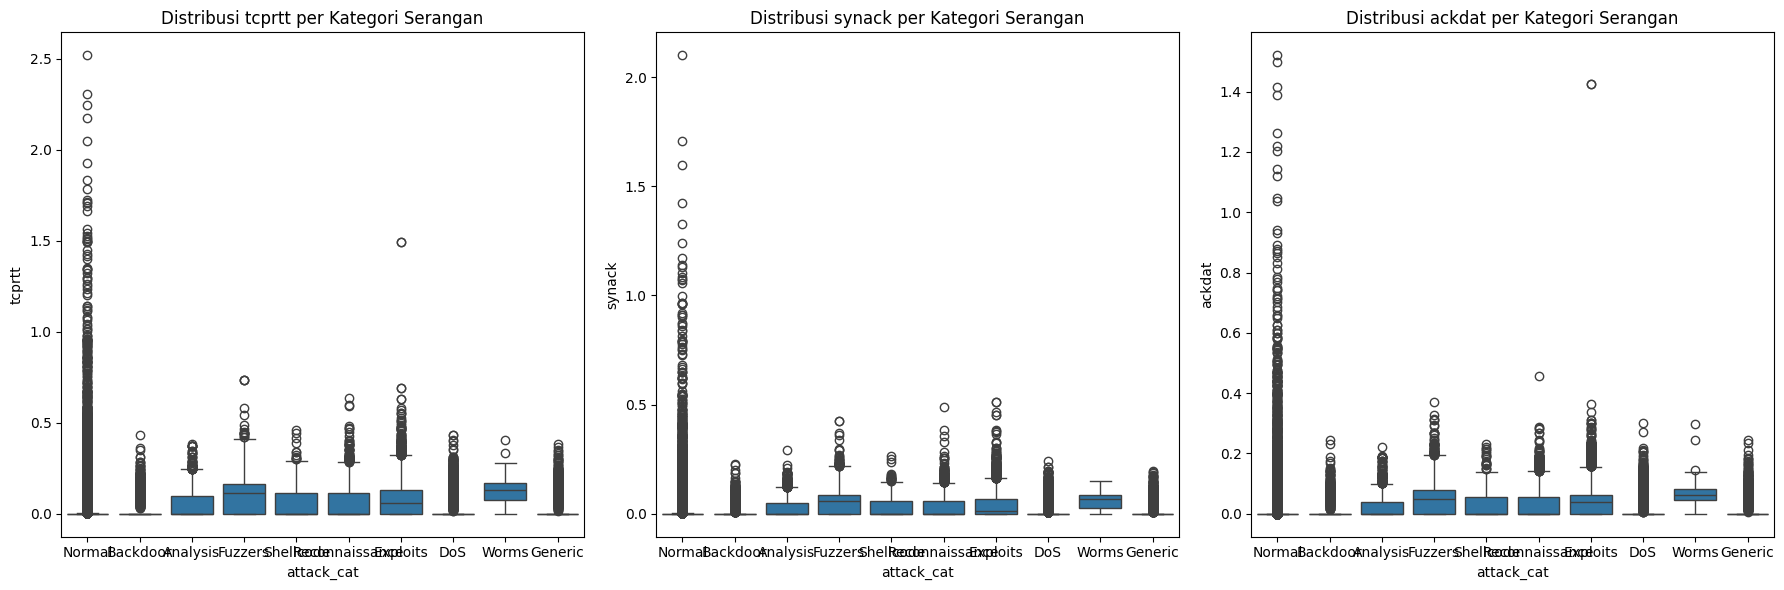

In [ ]:
# Mengelompokkan data berdasarkan kategori serangan dan menghitung rata-rata
grouped_data = df.groupby('attack_cat')[['tcprtt', 'synack', 'ackdat']].mean()

# Visualisasi dengan box plot untuk setiap fitur
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='attack_cat', y='tcprtt', ax=axes[0])
axes[0].set_title('Distribusi tcprtt per Kategori Serangan')
sns.boxplot(data=df, x='attack_cat', y='synack', ax=axes[1])
axes[1].set_title('Distribusi synack per Kategori Serangan')
sns.boxplot(data=df, x='attack_cat', y='ackdat', ax=axes[2])
axes[2].set_title('Distribusi ackdat per Kategori Serangan')

plt.tight_layout()
plt.show()

#### Insight:

1. Record normal cenderung memiliki variasi yang lebih besar dan outlier yang lebih tinggi untuk ketiga fitur TCP setup dibandingkan dengan record serangan.

2. Beberapa jenis serangan (seperti DoS dan Worms) menunjukkan pola yang sangat konsisten dengan variasi minimal, yang bisa menjadi indikator untuk mendeteksi serangan tersebut.

3. Serangan Fuzzer dan Exploits umumnya menunjukkan variasi yang lebih besar dibandingkan jenis serangan lainnya untuk ketiga fitur.
Pola-pola ini dapat digunakan sebagai fitur penting dalam mendeteksi dan mengklasifikasikan berbagai jenis serangan jaringan.

### Step 2

Try to formulate five other new questions and answer them with the methods used before.

#### 4. What are the most common state in the dataset, and are certain state more associated with specific attack categories?

In [ ]:
df["state"].value_counts()

,count
state,
INT,82275
FIN,77825
CON,13152
REQ,1991
RST,83
ECO,12
PAR,1
URN,1
no,1


In [ ]:
df[["attack_cat","state"]].value_counts()

attack_cat      state
Generic         INT      39484
Normal          FIN      37175
Exploits        FIN      19591
                INT      12839
Normal          CON      12099
Fuzzers         FIN      11758
DoS             INT       9521
Fuzzers         INT       6050
Normal          INT       5715
Reconnaissance  INT       5291
                FIN       5095
DoS             FIN       2216
Analysis        INT       1408
Backdoor        INT       1376
Normal          REQ        925
Exploits        CON        596
Shellcode       INT        576
Analysis        FIN        564
Shellcode       FIN        557
Generic         FIN        484
Exploits        REQ        360
Fuzzers         REQ        344
DoS             CON        295
Backdoor        FIN        272
DoS             REQ        230
Worms           FIN        113
Normal          RST         71
Backdoor        CON         57
Reconnaissance  REQ         57
                CON         46
Backdoor        REQ         41
Fuzzers         CON         32
Analysis        REQ         20
Generic         CON         17
Worms           INT         15
Generic         REQ         14
Normal          ECO         12
Analysis        CON          8
Exploits        RST          7
DoS             RST          2
Worms           CON          2
Reconnaissance  RST          2
Generic         RST          1
Normal          URN          1
                PAR          1
                no           1
Name: count, dtype: int64

In [ ]:
# Create contingency table
contingency_table = pd.crosstab(df['state'], df['attack_cat'])
print("\nContingency Table:")
print(contingency_table.to_string())

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")


Contingency Table:
attack_cat  Analysis  Backdoor   DoS  Exploits  Fuzzers  Generic  Normal  Reconnaissance  Shellcode  Worms
state                                                                                                     
CON                8        57   295       596       32       17   12099              46          0      2
ECO                0         0     0         0        0        0      12               0          0      0
FIN              564       272  2216     19591    11758      484   37175            5095        557    113
INT             1408      1376  9521     12839     6050    39484    5715            5291        576     15
PAR                0         0     0         0        0        0       1               0          0      0
REQ               20        41   230       360      344       14     925              57          0      0
RST                0         0     2         7        0        1      71               2          0      0
URN              

#### Insight:

State yang sering digunakan adalah INT sebanyak 82275 dan FIN sebanyak 77825. Berdasarkan tabel kontingensi, state yang memiliki nilai yang signifikan yaitu CON, FIN, INT. State CON dan FIN lebih sering dugunakan dalam Normal records. Sedangkan INT sering digunakan di Generic attacks.

#### 5. What are the most common service in the dataset, and are certain service more associated with specific attack categories?

In [ ]:
df["service"].value_counts()

,count
service,
-,94168
dns,47294
http,18724
smtp,5058
ftp-data,3995
ftp,3428
ssh,1302
pop3,1105
dhcp,94


In [ ]:
df[["attack_cat","service"]].value_counts()

attack_cat  service
Generic     dns        39116
Normal      -          36512
Exploits    -          17206
Fuzzers     -          16453
DoS         -          10473
                       ...  
Normal      radius         2
Generic     ssh            1
            snmp           1
            pop3           1
Normal      snmp           1
Name: count, Length: 64, dtype: int64

In [ ]:
# Create contingency table
contingency_table = pd.crosstab(df['service'], df['attack_cat'])
print("\nContingency Table:")
print(contingency_table.to_string())

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")


Contingency Table:
attack_cat  Analysis  Backdoor    DoS  Exploits  Fuzzers  Generic  Normal  Reconnaissance  Shellcode  Worms
service                                                                                                    
-               1436      1647  10473     17206    16453      504   36512            8788       1133     16
dhcp               0         0     33        52        0        9       0               0          0      0
dns                0         0    107       185      358    39116    7493              35          0      0
ftp                0         5     50      1615      537        3    1218               0          0      0
ftp-data           0         0      8      1435        0        0    2552               0          0      0
http             558        83   1216      8677      836      289    5348            1603          0    114
irc                0        11      4        10        0        0       0               0          0      0
pop3    

#### Insight:

Service yang sering digunakan yaitu NaN atau tidak menggunakan service, dan yang kedua yaitu menggunakan dns sebanyak 47294. Dari tabel kontingensi, diperolah hasil yang signifikan di beberapa service. Normal kebanyakan tidak menggunakan service. Kemudian DNS lebih sering digunakan di Generic attacks, kemudian POP3 sering digunakan di Exploits, dan SMTP juga sering digunakan di Exploits, dan untuk service sisanya tidak terlalu signifikan.

#### 6. Are there any significant differences in the values of network characteristics such as sttl, dttl, smean, dmean, swin, and dwin between attack and normal records?


Statistical Analysis Results:
-----------------------------

STTL Analysis:
Normal Records - Median: 31.00, Mean: 75.45
Attack Records - Median: 254.00, Mean: 228.40
P-value: 0.00e+00
Effect Size: 0.616
Significance: Significant
Effect Interpretation: Large effect

DTTL Analysis:
Normal Records - Median: 29.00, Mean: 64.28
Attack Records - Median: 0.00, Mean: 86.80
P-value: 0.00e+00
Effect Size: 0.230
Significance: Significant
Effect Interpretation: Small effect

SMEAN Analysis:
Normal Records - Median: 73.00, Mean: 139.98
Attack Records - Median: 76.00, Mean: 135.24
P-value: 5.08e-145
Effect Size: 0.061
Significance: Significant
Effect Interpretation: Negligible effect

DMEAN Analysis:
Normal Records - Median: 89.00, Mean: 253.07
Attack Records - Median: 0.00, Mean: 63.69
P-value: 0.00e+00
Effect Size: 0.515
Significance: Significant
Effect Interpretation: Large effect

SWIN Analysis:
Normal Records - Median: 255.00, Mean: 178.11
Attack Records - Median: 0.00, Mean: 87.23
P-value: 0.

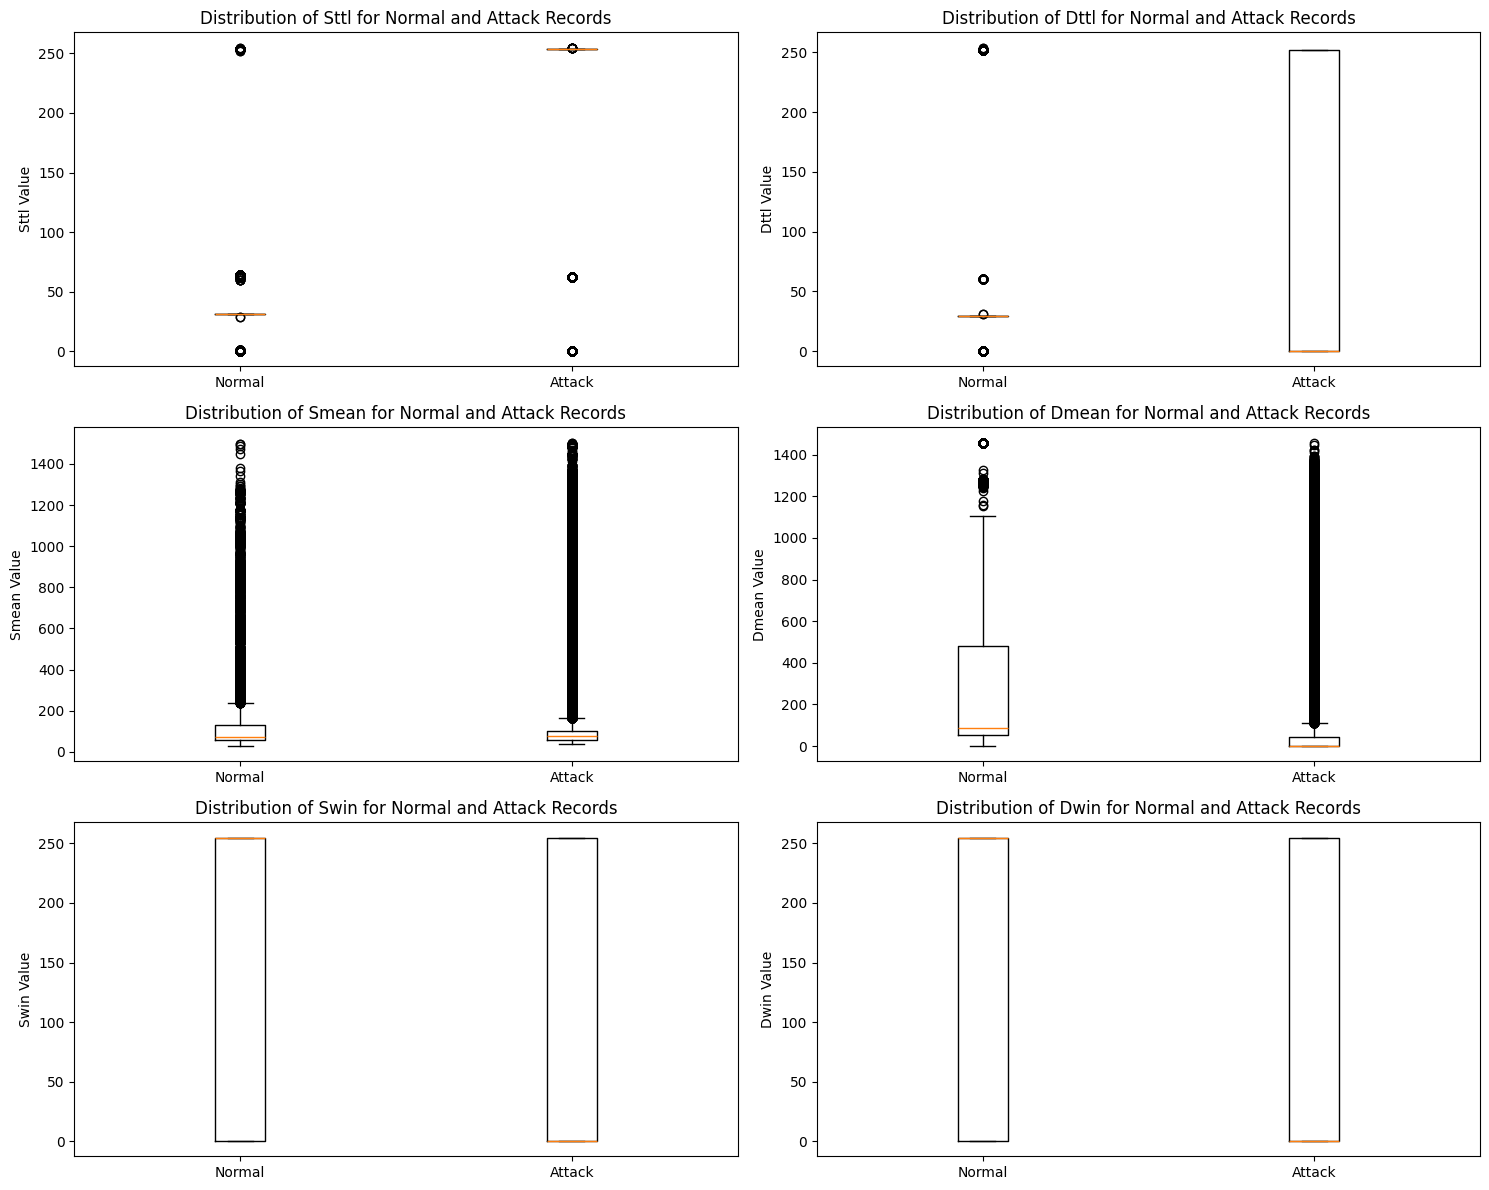

In [ ]:
def analyze_network_characteristics(df):
    """
    Analyze network characteristics differences between normal and attack records

    Parameters:
    df (pandas.DataFrame): DataFrame containing network characteristics and labels
    """
    # Features to analyze
    features = ['sttl', 'dttl', 'smean', 'dmean', 'swin', 'dwin']

    # Statistical results storage
    stats_results = {}

    for feature in features:
        # Perform Mann-Whitney U test
        normal_data = df[df['label'] == 0][feature]
        attack_data = df[df['label'] == 1][feature]

        statistic, p_value = stats.mannwhitneyu(normal_data, attack_data, alternative='two-sided')

        # Calculate effect size (r = Z / sqrt(N))
        n1, n2 = len(normal_data), len(attack_data)
        z_score = (statistic - (n1 * n2 / 2)) / np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
        effect_size = abs(z_score / np.sqrt(n1 + n2))

        # Store results
        stats_results[feature] = {
            'normal_median': normal_data.median(),
            'attack_median': attack_data.median(),
            'normal_mean': normal_data.mean(),
            'attack_mean': attack_data.mean(),
            'p_value': p_value,
            'effect_size': effect_size
        }

    # Print statistical summary
    print("\nStatistical Analysis Results:")
    print("-----------------------------")
    for feature, results in stats_results.items():
        print(f"\n{feature.upper()} Analysis:")
        print(f"Normal Records - Median: {results['normal_median']:.2f}, Mean: {results['normal_mean']:.2f}")
        print(f"Attack Records - Median: {results['attack_median']:.2f}, Mean: {results['attack_mean']:.2f}")
        print(f"P-value: {results['p_value']:.2e}")
        print(f"Effect Size: {results['effect_size']:.3f}")
        print(f"Significance: {'Significant' if results['p_value'] < 0.05 else 'Not Significant'}")
        print(f"Effect Interpretation: {interpret_effect_size(results['effect_size'])}")

    return stats_results

def interpret_effect_size(effect_size):
    """
    Interpret the effect size based on Cohen's guidelines
    """
    if effect_size < 0.1:
        return "Negligible effect"
    elif effect_size < 0.3:
        return "Small effect"
    elif effect_size < 0.5:
        return "Medium effect"
    else:
        return "Large effect"

# Run the analysis
results = analyze_network_characteristics(df)

# Plot each feature's values for normal and attack records
features = ['sttl', 'dttl', 'smean', 'dmean', 'swin', 'dwin']
plt.figure(figsize=(15, 12))

for idx, feature in enumerate(features, 1):
    plt.subplot(3, 2, idx)
    data = [df[df['label'] == 0][feature], df[df['label'] == 1][feature]]
    plt.boxplot(data, labels=['Normal', 'Attack'])
    plt.ylabel(f'{feature.capitalize()} Value')
    plt.title(f'Distribution of {feature.capitalize()} for Normal and Attack Records')

plt.tight_layout()
plt.show()

#### Insight:

Berdasarkan hasil di atas, variabel STTL dan DMEAN menunjukkan pengaruh yang besar atau sangat signifikan. Terlihat dari boxplot bahwa pada normal records, nilai STTL terkonsentrasi di sekitar angka 30, sedangkan pada attack records, nilai STTL berkumpul di sekitar 250, menandakan bahwa STTL memiliki perbedaan signifikan antara dua features tersebut. Untuk DMEAN, pada normal records, nilai DMEAN berada dalam rentang 100 hingga 400, sementara pada attack records, nilai DMEAN terkonsentrasi dalam rentang 0 hingga 100, yang juga menunjukkan bahwa DMEAN memiliki perbedaan signifikan antara kedua features ini.

#### 7. Are there any significant differences in the values of network characteristics such as ct_src_sport_ltm and ct_dst_sport_ltm more associated with specific attack categories?


Statistical Analysis Results:
-----------------------------

CT_SRC_DPORT_LTM Analysis for Normal:
Normal Records - Median: 1.00, Mean: 1.79
Attack Records - Median: 1.00, Mean: 1.79
P-value: 1.00e+00
Effect Size: 0.000
Significance: Not Significant
Effect Interpretation: Negligible effect

CT_SRC_DPORT_LTM Analysis for Backdoor:
Normal Records - Median: 1.00, Mean: 1.79
Attack Records - Median: 2.00, Mean: 2.11
P-value: 1.60e-171
Effect Size: 0.092
Significance: Significant
Effect Interpretation: Negligible effect

CT_SRC_DPORT_LTM Analysis for Analysis:
Normal Records - Median: 1.00, Mean: 1.79
Attack Records - Median: 2.00, Mean: 2.36
P-value: 0.00e+00
Effect Size: 0.127
Significance: Significant
Effect Interpretation: Small effect

CT_SRC_DPORT_LTM Analysis for Fuzzers:
Normal Records - Median: 1.00, Mean: 1.79
Attack Records - Median: 1.00, Mean: 2.03
P-value: 0.00e+00
Effect Size: 0.114
Significance: Significant
Effect Interpretation: Small effect

CT_SRC_DPORT_LTM Analysis for 

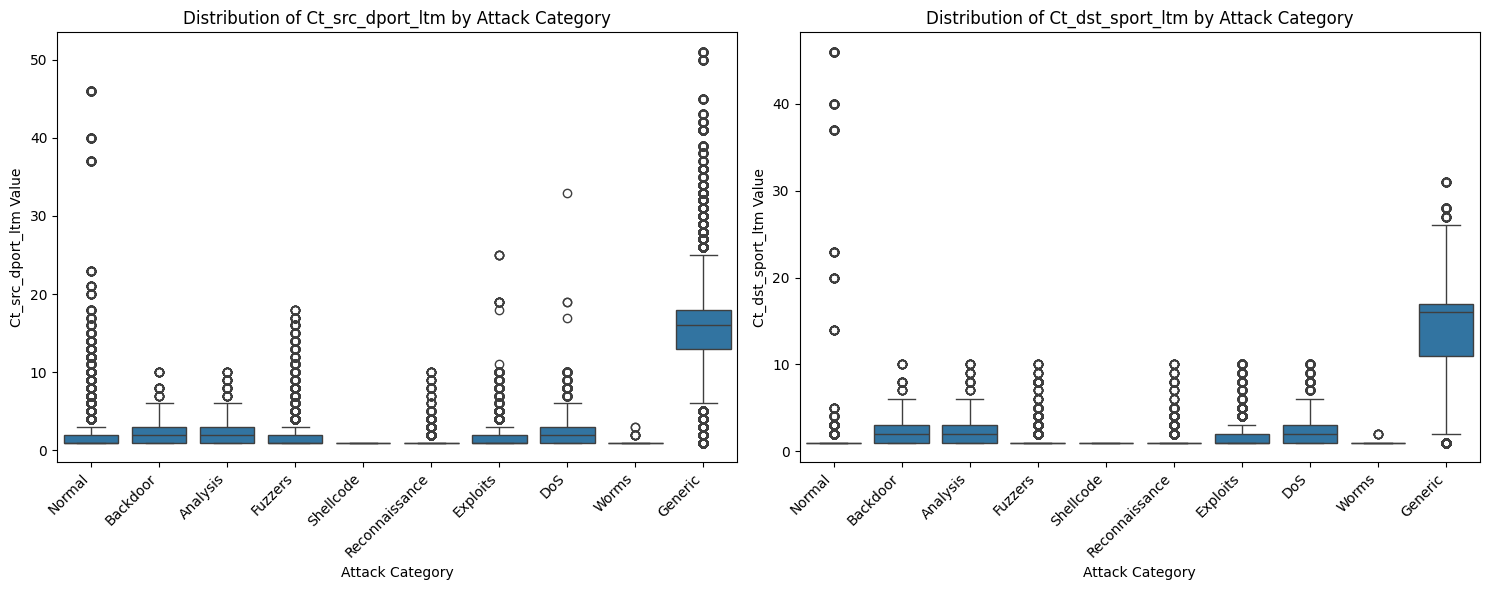

In [ ]:
def analyze_network_characteristics_by_attack_cat(df):
    """
    Analyze network characteristics differences between different attack categories

    Parameters:
    df (pandas.DataFrame): DataFrame containing network characteristics, labels, and attack categories
    """
    # Features to analyze
    features = ['ct_src_dport_ltm', 'ct_dst_sport_ltm']

    # Statistical results storage
    stats_results = {}

    for feature in features:
        for attack_cat in df['attack_cat'].unique():
            # Filter data based on attack category
            attack_data = df[df['attack_cat'] == attack_cat][feature]
            normal_data = df[df['label'] == 0][feature]

            # Perform Mann-Whitney U test (Comparing attack category with normal records)
            statistic, p_value = stats.mannwhitneyu(normal_data, attack_data, alternative='two-sided')

            # Calculate effect size (r = Z / sqrt(N))
            n1, n2 = len(normal_data), len(attack_data)
            z_score = (statistic - (n1 * n2 / 2)) / np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
            effect_size = abs(z_score / np.sqrt(n1 + n2))

            # Store results
            if feature not in stats_results:
                stats_results[feature] = {}
            stats_results[feature][attack_cat] = {
                'normal_median': normal_data.median(),
                'attack_median': attack_data.median(),
                'normal_mean': normal_data.mean(),
                'attack_mean': attack_data.mean(),
                'p_value': p_value,
                'effect_size': effect_size
            }

    # Print statistical summary
    print("\nStatistical Analysis Results:")
    print("-----------------------------")
    for feature, attack_cat_results in stats_results.items():
        for attack_cat, results in attack_cat_results.items():
            print(f"\n{feature.upper()} Analysis for {attack_cat}:")
            print(f"Normal Records - Median: {results['normal_median']:.2f}, Mean: {results['normal_mean']:.2f}")
            print(f"Attack Records - Median: {results['attack_median']:.2f}, Mean: {results['attack_mean']:.2f}")
            print(f"P-value: {results['p_value']:.2e}")
            print(f"Effect Size: {results['effect_size']:.3f}")
            print(f"Significance: {'Significant' if results['p_value'] < 0.05 else 'Not Significant'}")
            print(f"Effect Interpretation: {interpret_effect_size(results['effect_size'])}")

    return stats_results

# Run the analysis
results = analyze_network_characteristics_by_attack_cat(df)

# Visualize the results with boxplots
features = ['ct_src_dport_ltm', 'ct_dst_sport_ltm']

plt.figure(figsize=(15, 6))

for idx, feature in enumerate(features, 1):
    plt.subplot(1, 2, idx)
    sns.boxplot(data=df, x='attack_cat', y=feature)
    plt.xlabel('Attack Category')
    plt.ylabel(f'{feature.capitalize()} Value')
    plt.title(f'Distribution of {feature.capitalize()} by Attack Category')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Insight:

Diperoleh bahwa CT_SRC_DPORT_LTM untuk Generic attacks dan CT_DST_SPORT_LTM memiliki efek yang sangat besar dan signifikan. Berdasarkan visualisasi boxplot, terlihat bahwa nilai CT_SRC_DPORT_LTM untuk Generic attacks terkonsentrasi pada rentang 10 - 20, sedangkan untuk jenis serangan lainnya, nilainya berada di bawah 5, sehingga menunjukkan signifikansi yang tinggi. Begitu juga dengan CT_DST_SPORT_LTM, di mana nilai untuk Generic attacks terkumpul pada rentang 10 - 20, sementara untuk jenis serangan lainnya berada di bawah 5, yang juga sangat signifikan. Hal ini menunjukkan bahwa CT_SRC_DPORT_LTM dan CT_DST_SPORT_LTM dapat digunakan untuk memprediksi jenis serangan, terutama dalam mengidentifikasi Generic attacks.

#### 8. What is the correlation between state and proto, and visualize the distribution between them.

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

correlation = cramers_v(df['state'], df['proto'])
print(f"Cramér's V between state and proto: {correlation:.3f}")

Cramér's V between state and proto: 0.520


In [ ]:
# Create contingency table
contingency_table = pd.crosstab(df['proto'], df['state'])
print("\nContingency Table:")
print(contingency_table.to_string())

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")


Contingency Table:
state          CON  ECO    FIN    INT  PAR  REQ  RST  URN  no
proto                                                        
3pc              0    0      0    100    0    0    0    0   0
a/n              0    0      0    100    0    0    0    0   0
aes-sp3-d        0    0      0    100    0    0    0    0   0
any              0    0      0    300    0    0    0    0   0
argus            0    0      0     98    0    0    0    0   0
aris             0    0      0    100    0    0    0    0   0
arp             90    0      0   2769    0    0    0    0   0
ax.25            0    0      0    100    0    0    0    0   0
bbn-rcc          0    0      0     98    0    0    0    0   0
bna              0    0      0    100    0    0    0    0   0
br-sat-mon       0    0      0    100    0    0    0    0   0
cbt              0    0      0     99    0    0    0    0   0
cftp             0    0      0    100    0    0    0    0   0
chaos            0    0      0     99    0    0   

#### Insight:

Didapatkan bahwa korelasi antara protocol dan state sebesar 0,52, yang menunjukkan adanya korelasi yang cukup kuat. Berdasarkan tabel kontingensi, terdapat beberapa nilai signifikan: state INT lebih sering menggunakan protocol UDP dengan frekuensi 51.623, sementara yang lain umumnya hanya sekitar 100; state CON juga menunjukkan nilai signifikan pada protocol UDP dengan frekuensi 11.350, sedangkan yang lainnya sebagian besar bernilai 0; dan state FIN memiliki nilai signifikan pada protocol TCP dengan frekuensi 77.825, sementara nilai lainnya 0. Terdapat hubungan kuat antara state tertentu dan jenis protocol yang digunakan, dengan beberapa state secara konsisten memilih protokol tertentu.